# 19.二分探索法

### ABC231 C Dif:194
url : https://atcoder.jp/contests/abc231/tasks/abc231_c

### [概要]
二分探索は「条件を満たす最大/最小」を高速で探し出すためのアルゴリズム。  
考え方は簡単なのだが慣れるまでは実装に苦労すると思う。  
まずは【実装のコツ】と【提出】を読んで、写して、最終的に何も見ずに自分で実装できるまで練習しよう。

### [解説]
数列をソートし、身長がxj以上の生徒のうち一番小さい人が何番目かを確認する。  
一番小さい人がk番目ならば(N-k)人と二分探索は区間の中央の値が条件を満たすか確認し、徐々に区間を狭めて目的の値を得るアルゴリズム。  

身長がxj以上の生徒のうち一番小さい人は二分探索で探すことで一回あたりO(logN)で計算ができる。  
- **二分探索法**  
(1)左=区間の最小、右=区間の最大 とする。  
(2)中央=( 左 + 右 )//2が条件を満たすか確認  
(3)(2)の結果より左または右を更新する  
(4)1<( 右 - 左 )となっている間(2)~(4)を繰り返す  
二分探索について、解説動画  
url : https://www.youtube.com/watch?v=ZUwewxmXyH0  

~例~  
N Q : 9 1  
A : 2 1 4 6 8 6 3 10 15  
x1 : 9  

まずはAをソートする  
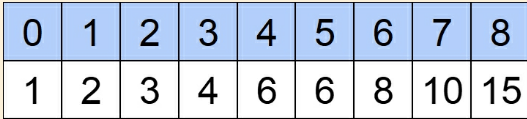  
x1 = 9のクリエについて二分探索で「身長がxl=9以上の中で最も小さい人は何番目か」を確認する。  
二分探索するには区間の中に答えがなければならない。  
x1=9はAの中で最小の要素1より大きく、Aの中で最大の要素15以下であることをまず確認しよう。  
もしxがAの中で最小の要素以下ならば答えはN人 もしxがAの中で最大の要素より大きければ答えは0人 となり、二分探索をするまでもない。

(1)左=区間の最小、右=区間の最大 とする
左=0  
右=8(=N-1)  
となる。  
以下図の赤い部分が現在の探索範囲。  
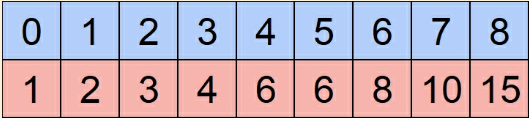  
(2)中央=( 左 + 右 )//2が条件を満たすか確認  
中央 = (0+8)//2=4となる。  
A[4]=6であるからx1=9より小さいので条件「身長がx1=9以上」という条件は満たさない。  
(3)(2)の結果より左または右を更新する条件は満たさない場合は  
中央 = 左  
と更新する。  
これで探索範囲が以下のように半分になる。  
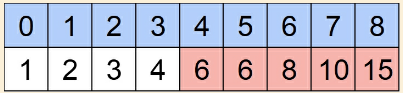  
(4)1<(右-左)となっている間(2)~(4)を繰り返す  
(右-左)=8-4=4だから(2)へ戻る。  

(2)中央=( 左 + 右 )//2が条件を満たすか確認  
中央 =(4+8)//2 = 6 となる  
A[6]=6であるから、x1=9より小さいので条件= 「身長がxl=9以上」という条件を満たさない。  

(3)(2)の条件より左または右を更新する  
条件を満たさない場合は  
中央 = 左  
と更新する。  
これで探索範囲がまた半分になる。  
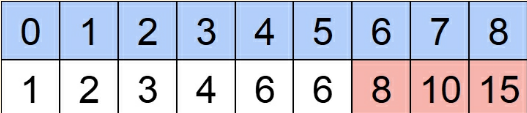  
(4)1<( 右 - 左 )となっている間(2)~(4)を繰り返す  
( 右 - 左 )=8-6=2だから(2)へ戻る  

(2)中央=( 左 + 右 )//2が条件を満たすか確認  
中央=(6+8)//2=7 となる  
A[7]=10であるからxl=9以上。条件 = 「身長がxl=9以上」という条件を満たす。

(3)(2)の結果より左または右を更新する  
条件を満たす場合は  
中央=右  
と更新する  
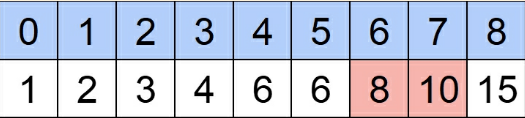  
(4)1<( 右 - 左 )となっている間 (2)~(4)を繰り返す  
( 右 - 左 )=7-6=1だから終了
探索が終了した範囲の右側、つまりインデックス「7」が「身長がx1=9以上」という条件を満たす最小の数。  
よって(N-7)=9-7=2人がx1=9以上の人数となる。  
「○○以上のうち最小」を探す二分探索のコツは 左=条件を満たさない 右=条件を満たす を常に満たすように範囲を更新していくこと。  
「○○以下のうち最大」を探す場合はこれらが逆になる。  

### [実装のコツ]
- **二分探索**  
  二分探索は[ 左, 右]の区間をとって中央が条件を満たすか?を判定し、区間を狭めていく方法である。

  本文の場合実装は以下のように行う。

In [ ]:
#二分探索
#引数 : x 返り値 : 「身長がx以上の中で最も小さい人は何番目か」
def Nibutan(x):
    #左端
    left = 0
    #右端
    right = N-1
    
    #1<右端 - 左端の間
    while 1<left-right:
        #中央
        center = (left + right)//2
        
        #A[center]<xならば(条件を満たさない場合)
        if A[center] < x:
            #左端を中央へ更新
            left = center
            #そうでなければ(x <= A[center]条件を満たす場合)
        else:
            #右端を中央へ更新
            right = center
            
    #右端を返す
    return right

他の問題でも二分探索はほとんど同じ書き方が使える。  
(1)左=区間の最小、右=区間の最大とする  
本問の場合、以下のように初期値を取っている。  
左：0  
右：N-1  
(2)中央=(左+右)//2が条件を満たすか確認  
(3)(2)の結果より左または右を更新する  
　・中央が条件を満たす：右(または左)=中央と更新  
　・中央が条件を満たさない：左(または右)=中央と更新 (4)1<(右-左)となっている間(2)~(4)を繰り返す  
(4)1<( 左 - 右 )となっている間(2)~(4)を繰り返す。

In [1]:
#二分探索の定義
def nibutan(x):
    l = 0
    r = N-1
    while r - l > 1:
        c = (r + l)//2
        if A[c] < x:
            l = c
        else:
            r = c
    return r

#入力
N, Q = map(int,input().split())
A = list(map(int,input().split()))
A.sort()

for j in range(Q):
    x = int(input())
    if x <= A[0]:
        print(N)
    elif x > A[N-1]:
        print(0)
    else:
        print(N-nibutan(x))

ValueError: not enough values to unpack (expected 2, got 0)